In [5]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [6]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test.shape  

(10000, 32, 32, 3)

In [8]:
y_train.shape


(50000, 1)

In [9]:
y_train.shape

(50000, 1)

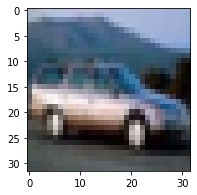

In [10]:
plt.figure(figsize=(15,3))
plt.imshow(X_train[4])

In [11]:
y_train[4],y_train[2]

(array([1], dtype=uint8), array([9], dtype=uint8))

### Function to plot image

In [12]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [13]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [14]:
classes = ["airplane","automobile","bird","cat","dog","dear","frog","horse","ship","truck"]

#### 
    

In [15]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,3))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

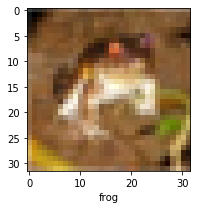

In [16]:
plot_sample(X_train,y_train,0)

#### Scaling - dividing by 255

In [17]:
X_train= X_train/255
X_test= X_test/255

### ANN Model

In [20]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid') 
])

ann.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ann.fit(X_train,y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 131s 83ms/step - loss: 1.8118 - accuracy: 0.3544
Epoch 2/5
1563/1563 [==============================] - 110s 70ms/step - loss: 1.6212 - accuracy: 0.4272
Epoch 3/5
1563/1563 [==============================] - 113s 72ms/step - loss: 1.5386 - accuracy: 0.4577
Epoch 4/5
1563/1563 [==============================] - 130s 83ms/step - loss: 1.4795 - accuracy: 0.4819
Epoch 5/5
1563/1563 [==============================] - 133s 85ms/step - loss: 1.4298 - accuracy: 0.4973


In [25]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 9s 24ms/step - loss: 1.4694 - accuracy: 0.4824


[1.469365119934082, 0.48240000009536743]

#### Classification Report

In [29]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_predict = ann.predict(X_test)
y_predict_classes = [np.argmax(element) for element in y_predict]


print("Classification report : \n",classification_report(y_test,y_predict_classes))

Classification report : 
               precision    recall  f1-score   support

           0       0.63      0.48      0.55      1000
           1       0.63      0.56      0.60      1000
           2       0.34      0.40      0.37      1000
           3       0.30      0.52      0.38      1000
           4       0.62      0.17      0.26      1000
           5       0.38      0.35      0.37      1000
           6       0.52      0.56      0.54      1000
           7       0.50      0.62      0.56      1000
           8       0.70      0.54      0.61      1000
           9       0.52      0.61      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.52      0.48      0.48     10000
weighted avg       0.52      0.48      0.48     10000



### CNN Model

In [23]:
cnn = models.Sequential([
    
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax') 
])



In [24]:
cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

cnn.fit(X_train,y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 61s 38ms/step - loss: 1.5000 - accuracy: 0.4581
Epoch 2/5
1563/1563 [==============================] - 79s 50ms/step - loss: 1.1315 - accuracy: 0.6025
Epoch 3/5
1563/1563 [==============================] - 74s 47ms/step - loss: 0.9919 - accuracy: 0.6540
Epoch 4/5
1563/1563 [==============================] - 57s 36ms/step - loss: 0.9028 - accuracy: 0.6873
Epoch 5/5
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8357 - accuracy: 0.70950s - loss: 0.8352 - accura


In [26]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9069 - accuracy: 0.6880


[0.9068955779075623, 0.6880000233650208]

In [30]:
y_predict = cnn.predict(X_test)
y_predict_classes = [np.argmax(element) for element in y_predict]


In [31]:
print("Classification report : \n",classification_report(y_test,y_predict_classes))

Classification report : 
               precision    recall  f1-score   support

           0       0.71      0.78      0.74      1000
           1       0.82      0.78      0.80      1000
           2       0.55      0.61      0.58      1000
           3       0.50      0.54      0.52      1000
           4       0.65      0.59      0.62      1000
           5       0.65      0.52      0.58      1000
           6       0.67      0.84      0.75      1000
           7       0.73      0.75      0.74      1000
           8       0.85      0.75      0.79      1000
           9       0.80      0.72      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

